{'n_neighbors': 10} 0.8400000000000001
New sample prediction:  [2]


(-10.0, 10.0)

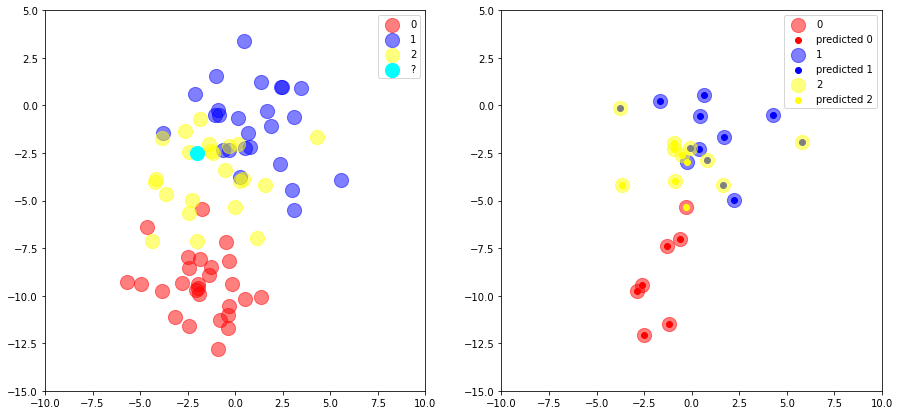

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs

# Generate 2d toy dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1.8, random_state=2)
test_sample = [-2, -2.5]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create machine learning model
param_grid = {'n_neighbors': [i for i in range(1, 31)]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_predict = grid_search.predict(X_test)

# Print parameters used and best score
print(grid_search.best_params_, grid_search.best_score_)
print("New sample prediction: ", grid_search.predict([test_sample]))

# Plotting crap -------------------
# scatter plot, dots colored by class value
X_plot = np.append(X_train, [test_sample], axis=0)
y_plot = np.append(y_train, 3)
_, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].scatter(X_plot[:,0][y_plot==0], X_plot[:,1][y_plot==0], s=200, alpha=0.5, label='0', c='red')
ax[0].scatter(X_plot[:,0][y_plot==1], X_plot[:,1][y_plot==1], s=200, alpha=0.5, label='1', c='blue')
ax[0].scatter(X_plot[:,0][y_plot==2], X_plot[:,1][y_plot==2], s=200, alpha=0.5, label='2', c='yellow')
ax[0].scatter(X_plot[:,0][y_plot==3], X_plot[:,1][y_plot==3], s=200, label='?', c='cyan')
ax[0].legend(loc='best')
ax[0].set_ylim(-15, 5)
ax[0].set_xlim(-10, 10)
ax[1].scatter(X_test[:,0][y_test==0], X_test[:,1][y_test==0], s=200, alpha=0.5, label='0', c='red')
ax[1].scatter(X_test[:,0][y_predict==0], X_test[:,1][y_predict==0], label='predicted 0', c='red')
ax[1].scatter(X_test[:,0][y_test==1], X_test[:,1][y_test==1], s=200, alpha=0.5, label='1', c='blue')
ax[1].scatter(X_test[:,0][y_predict==1], X_test[:,1][y_predict==1], label='predicted 1', c='blue')
ax[1].scatter(X_test[:,0][y_test==2], X_test[:,1][y_test==2], s=200, alpha=0.5, label='2', c='yellow')
ax[1].scatter(X_test[:,0][y_predict==2], X_test[:,1][y_predict==2], label='predicted 2', c='yellow')
ax[1].legend(loc='best')
ax[1].set_ylim(-15, 5)
ax[1].set_xlim(-10, 10)